## Computing a difference

Suppose we want to compute
$$1-\cos(0.001^2)^2.$$
I suppose it might make sense to just compute it directly:

In [1]:
import numpy as np
x = 0.001
approx1 = 1-np.cos(x**2)**2
approx1

1.000088900582341e-12

Alternatively, we might use The Taylor approximation to the cosine
$$\cos(x) = 1 - \frac{1}{2}x^2 + \frac{1}{24}x^4 + O(x^6)$$
to estimate
$$1-\cos(x^2)^2 = x^4 - \frac{1}{3}x^8 + O(x^{12}).$$
Thus, I guess we might expect the following computation to be accurate to machine precision.

In [2]:
approx2 = x**4 - x**8/3
approx2

9.999999999996668e-13

Hmmm... These don't agree. I guess they're close

In [3]:
approx1 - approx2

8.8900582674246573e-17

But they're not particularly close, relative to their size.

In [4]:
(approx1 - approx2)/approx2

8.8900582674276198e-05

So, which is better? Well, the series had a big $O$ term of $O(x^{12})$. As I'm plugging in $x=0.001$ then we might roughly expect the series to be accurate to 36 digits, which is (of course) absurd.

If we really wanted 36 or more digits, we might try a multi-precision library.

In [5]:
from mpmath import mp
mp.dps = 40
x = mp.mpf('0.001')
high_precision_approx = 1-mp.cos(x**2)**2
high_precision_approx

mpf('0.0000000000009999999999996666666666667111114064385054663')

Let's compare this to our two previous approximations.

In [6]:
high_precision_approx - approx1, high_precision_approx - approx2

(mpf('-8.890058267434494694069550480449899453372429e-17'),
 mpf('-9.837361556275760301460140178152026339953317e-29'))

Wow!

## A fun relative error problem

Here's a crazy relative error problem where high precision is necessary.  It's based on the fact that $e^{\pi\sqrt{163}}$ is very close to an integer. In fact
$$e^{\pi\sqrt{163}} \approx 262537412640768744,$$
with a relative error of a about $10^{-30}$.  Check it out:

In [7]:
approx = mp.exp(mp.pi*mp.sqrt(163))
approx

mpf('262537412640768743.9999999999992500725972078')

In [8]:
# The error
error = approx - 262537412640768744
error

mpf('-0.0000000000007499274027921747441248912641187374106266361')

In [9]:
# The relative error
error/262537412640768744

mpf('-2.856459181375052871275848650697136426351813e-30')

In [10]:
# An attempt to measure the error with NumPy
np.exp(np.pi*np.sqrt(163)) - 262537412640768744

-480.0

## Plotting a Taylor expansion

Here's a plot of the sine function over the interval $[-12,12]$, together with the Taylor approximation
$$\sin(x) \approx \sum_{k=1}^{12} \frac{(-1)^k}{(2k+1)!} x^{2k+1}.$$

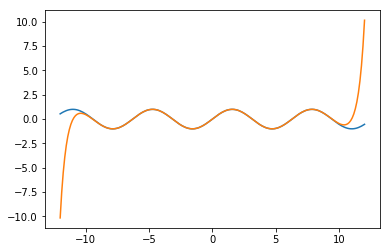

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
def s(n,x): return sum([(-1)**k*x**(2*k+1)/np.math.factorial(2*k+1) for k in range(n+1)])
x = np.linspace(-12,12,200)
y1 = np.sin(x)
y2 = s(12,x)
plt.plot(x,y1)
plt.plot(x,y2)